In [ ]:
#HOME LOAN PREDICTION USING MULTI LINEAR REGRESSION

**Home Loan Approval**

In [ ]:
#Creating the DATASET
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/gandipriyanka09/DataSets/main/loan_test.csv")
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,400900,177700,11300000,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,415800,70900,11500000,360.0,1.0,Urban
364,Male,No,0,Graduate,No,325000,199300,12600000,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,500000,239300,15800000,360.0,1.0,Rural


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              356 non-null    object 
 1   Married             367 non-null    object 
 2   Dependents          357 non-null    object 
 3   Education           367 non-null    object 
 4   Self_Employed       344 non-null    object 
 5   Applicant_Income    367 non-null    int64  
 6   Coapplicant_Income  367 non-null    int64  
 7   Loan_Amount         367 non-null    int64  
 8   Term                361 non-null    float64
 9   Credit_History      338 non-null    float64
 10  Area                367 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 31.7+ KB


In [ ]:
df.shape

(367, 11)

In [ ]:
df.size

4037

In [ ]:
#Cleaning The Data / EDA
#dropping the unwanted columns i.e; dropping the dependents, Area and the education column
df = df.drop(["Dependents","Education","Area"], axis = 'columns')
df

,Gender,Married,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
0,Male,Yes,No,572000,0,11000000,360.0,1.0
1,Male,Yes,No,307600,150000,12600000,360.0,1.0
2,Male,Yes,No,500000,180000,20800000,360.0,1.0
3,Male,Yes,No,234000,254600,10000000,360.0,NaN
4,Male,No,No,327600,0,7800000,360.0,1.0
...,...,...,...,...,...,...,...,...
362,Male,Yes,Yes,400900,177700,11300000,360.0,1.0
363,Male,Yes,No,415800,70900,11500000,360.0,1.0
364,Male,No,No,325000,199300,12600000,360.0,NaN
365,Male,Yes,No,500000,239300,15800000,360.0,1.0


In [ ]:
#Checking who got more loan approvals
df.value_counts(['Gender'])
#Males have got more loan approvals than females.

Gender
Male      286
Female     70
dtype: int64

<ipython-input-128-27242e706083>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount'])


<Axes: xlabel='Loan_Amount', ylabel='Density'>

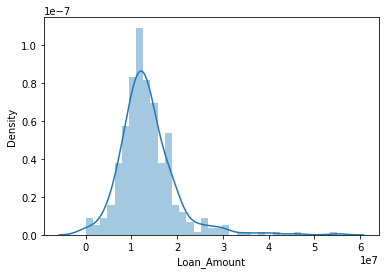

In [ ]:
#Visualization
import seaborn as sns
sns.distplot(df['Loan_Amount'])

In [ ]:
#Highest loan amount that has been approved
import numpy as np
np.max(df['Loan_Amount'])

55000000

<ipython-input-130-8f9e00b3b52f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Applicant_Income'])


<Axes: xlabel='Applicant_Income', ylabel='Density'>

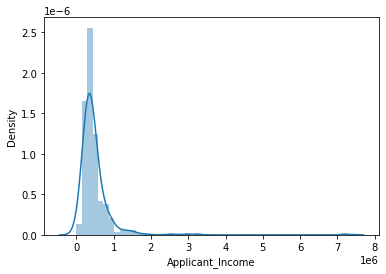

In [ ]:
sns.distplot(df['Applicant_Income'])

In [ ]:
#checking the null values
df.isna().sum()

Gender                11
Married                0
Self_Employed         23
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   6
Credit_History        29
dtype: int64

In [ ]:
df.isnull().sum()

Gender                11
Married                0
Self_Employed         23
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   6
Credit_History        29
dtype: int64

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder ## converts the string to numerical format


le = LabelEncoder()
df['Married'] = le.fit_transform(df['Married']) #No - 0, yes - 1
df['Gender'] = le.fit_transform(df['Gender']) #1 - Male, 0- Female
df['Self_Employed'] = le.fit_transform(df['Self_Employed']) #No - 0, yes -1
df = df.dropna() #dropping the null values
df

,Gender,Married,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
0,1,1,0,572000,0,11000000,360.0,1.0
1,1,1,0,307600,150000,12600000,360.0,1.0
2,1,1,0,500000,180000,20800000,360.0,1.0
4,1,0,0,327600,0,7800000,360.0,1.0
5,1,1,1,216500,342200,15200000,360.0,1.0
...,...,...,...,...,...,...,...,...
361,1,1,0,226900,216700,9900000,360.0,1.0
362,1,1,1,400900,177700,11300000,360.0,1.0
363,1,1,0,415800,70900,11500000,360.0,1.0
365,1,1,0,500000,239300,15800000,360.0,1.0


In [ ]:
#Dividing the data into input and output
x = df.drop('Loan_Amount', axis=1).loc[:,'Gender': ].values #input is all the columns except the Loan Amount so here we are dropping
x                                                    #that column and sliccing.

array([[1.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 3.600e+02,
        1.000e+00],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 1.500e+05, 3.600e+02,
        1.000e+00],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 1.800e+05, 3.600e+02,
        1.000e+00],
       ...,
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 7.090e+04, 3.600e+02,
        1.000e+00],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 2.393e+05, 3.600e+02,
        1.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 1.800e+02,
        1.000e+00]])

In [ ]:
y= df.iloc[:,5].values
y

array([11000000, 12600000, 20800000,  7800000, 15200000,  5900000,
       14700000, 28000000, 12300000,  9000000, 16200000, 16600000,
       12400000, 13100000, 20000000, 12600000, 30000000, 10000000,
        4800000,  2800000, 10100000, 12500000, 29000000, 14800000,
       27500000, 12500000,  7500000, 19200000, 15200000, 15800000,
       10100000, 17600000, 18500000,  9000000, 11600000, 13800000,
       10000000, 11000000,  9000000, 20000000,  8400000, 16200000,
       10800000, 18700000, 12400000, 12000000, 16000000,  3000000,
        9200000, 13000000, 13000000, 13400000, 17600000,  9000000,
       11000000, 12500000, 18900000, 10800000, 12500000, 13800000,
       13500000, 13000000, 18700000, 18800000,  9500000,  6500000,
       13900000, 23200000, 14400000, 15500000, 18600000,  5000000,
              0, 18500000, 16300000, 36000000, 14900000, 25700000,
       13100000, 10200000, 13500000,  9500000,  7700000, 20000000,
       39000000, 18500000, 10000000, 12300000, 11000000, 25600

In [ ]:
#Training and Testing variables
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
print(x.shape) 
print(x_train.shape) 
print(x_test.shape)

(333, 7)
(249, 7)
(84, 7)


In [ ]:
print(y.shape) 
print(y_train.shape) 
print(y_test.shape)

(333,)
(249,)
(84,)


In [ ]:
#RUN a CLASSIFIER/REGRESSOR/CLUSTERER
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#MODEL FITTING
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#PREDICTING THE OUTPUT
y_pred = model.predict(x_test)#By taking the input testing data , we are predicting the output
y_pred #PREDICTED VALUES

array([12149266.85082742, 12559430.74255981, 11610120.11411073,
       12562440.38350965, 13858522.41993775, 10356539.57959394,
       15402520.81716858, 13681040.65084167, 21326553.15988402,
       13432031.28620172, 13807962.55103809, 13181246.23580131,
       12877156.50850145, 16437675.07845588, 12422588.80930341,
       10522032.1522628 , 10792669.40882197,  9265482.87931693,
       11713191.47224844, 11592939.14675685, 12966515.1846955 ,
       12374072.3502399 , 13229470.2463038 , 11164047.04519362,
       13026917.63038287, 13735682.76246626, 14459118.3056553 ,
       11303955.06304936, 10962846.48316486, 12685862.28468577,
        9987488.41333945, 16725067.86145146, 12857194.00566589,
       10850890.81162697, 14745049.82541761, 15013594.588404  ,
       16438987.63344254, 13352654.60274816, 14796942.86010502,
       14591317.94709039, 14522049.70103118, 13004030.88274316,
       11087606.84158628, 17270277.7569616 , 12363433.84162338,
       11330684.44454458, 14731899.34119

In [ ]:
y_test#ACTUAL VALUES

array([18900000, 11000000,  6800000, 10800000, 13800000, 13000000,
       21200000, 16200000, 10200000, 12500000, 18700000, 14900000,
       18000000, 16000000, 12600000,  9000000, 10500000,  8300000,
       13200000, 13100000, 16300000,  9300000, 15000000, 12200000,
       11700000, 12500000, 12500000, 12500000,  7500000, 13900000,
       11900000, 41200000, 21300000,  2800000, 17600000, 12000000,
       33600000, 16500000, 23500000, 18800000, 17100000, 14200000,
        6500000, 28000000, 14700000,  9500000, 14400000, 29000000,
              0, 10200000, 11600000, 12500000, 15000000,  9500000,
       13500000,  9500000, 13100000, 12400000, 11000000,  7000000,
       14700000, 10000000, 22500000, 12500000, 10000000, 14300000,
        9900000, 17100000,  5500000,  8400000, 13000000, 15900000,
       14700000, 15000000, 18700000,  8800000, 12600000, 12200000,
       12300000,  6400000,  8000000, 17600000, 12600000, 15200000])

In [ ]:
#Individual Prediction
model.predict([x_train[10]])

array([12821053.78113022])

In [ ]:
model.predict([[1,1,0,600000,180000,360.0,1.0]])

array([14312559.16442409])